In [1]:
# General packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# NLP packages
import nltk
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from wordcloud import WordCloud

# Modeling packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 14, 6
plt.style.use('ggplot')

In [2]:
data = pd.read_csv("Data_student.csv")

In [4]:
data.head(10)

,Unnamed: 0,Question,Answer,Sentiment (Positive / Negative / Neutral / Ambiguous)
0,461129,5) What do you think were the strongest featur...,Having the option to be able to do our work wh...,Positive
1,62575,Please provide an example and/or explanation t...,The instructor's lectures were clear and organ...,Negative
2,550133,What did the instructor do well?\n,The instructor explained the content of the co...,Neutral
3,185121,Your instructor would like to know whether the...,Overall she did really well. I understood all ...,Ambiguous
4,384420,Comments:\n,good\n,Positive
5,223095,Please provide an example illustrating how rig...,too demanding of reading material regardless o...,Negative
6,24264,Please provide any comments about the faculty ...,Dr. <Faculty Name> has poor response skills. h...,Ambiguous
7,101011,Do you have any comments about the course mate...,No\n,Neutral
8,581994,Your instructor would like to know if there is...,Professor was knowledgeable of the topics and ...,Positive
9,348541,Comments:\n,"<Faculty Name>, you are indeed a born teacher\n",Positive


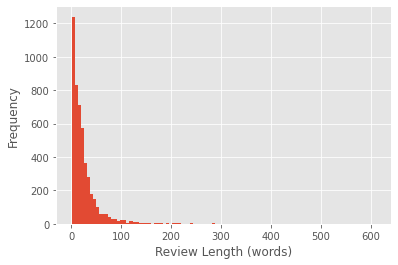

In [6]:
## Getting the number of words by splitting them by a space
words_per_review = data.Answer.apply(lambda x: len(x.split(" ")))
words_per_review.hist(bins = 100)
plt.xlabel('Review Length (words)')
plt.ylabel('Frequency')
plt.show()

In [7]:
print('Average words:', words_per_review.mean())
print('Skewness:', words_per_review.skew())

Average words: 24.46485260770975
Skewness: 5.474059635163822


In [18]:
# Let's also look at the distribution of ratings:
percent_val = 100 * data['Answer'].value_counts()/len(data)
percent_val

<Faculty Name>                                                                                                                                                                                 0.535972
.\n                                                                                                                                                                                            0.371058
#NAME?                                                                                                                                                                                         0.329829
Nothing\n                                                                                                                                                                                      0.267986
nothing\n                                                                                                                                                                                      0.267986


In [19]:
# percent_val.plot.bar()
# plt.show()

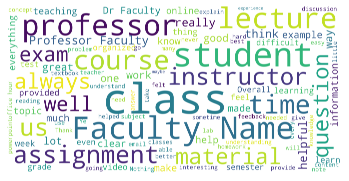

In [20]:
# Text visualization using word clouds (word clouds )¶

word_cloud_text = ''.join(data['Answer'])

wordcloud = WordCloud(max_font_size=100, # Maximum font size for the largest word
                      max_words=100, # The maximum number of words
                      background_color="white", # Background color for the word cloud image
                      scale = 10, # Scaling between computation and drawing
                      width=800, # Width of the canvas
                      height=400 # Height of the canvas
                     ).generate(word_cloud_text)

plt.figure()
plt.imshow(wordcloud, 
           interpolation="bilinear") # to make the displayed image appear more smoothly
plt.axis("off")
plt.show()

Pre-processing

In [21]:
# 1. Converting words to lower/upper case

data['answer_text_new'] = data['Answer'].str.lower()


In [24]:
# Word Tokenisation

from nltk import word_tokenize
import nltk
nltk.download('punkt')

# For reviews not converted to lowe case
token_lists = [word_tokenize(each) for each in data['answer_text_new']]
tokens = [item for sublist in token_lists for item in sublist]
print("Number of unique tokens then: ",len(set(tokens)))

# For reviews converted to lowe case
token_lists_lower = [word_tokenize(each) for each in data['answer_text_new']]
tokens_lower = [item for sublist in token_lists_lower for item in sublist]
print("Number of unique tokens now: ",len(set(tokens_lower)))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
Number of unique tokens then:  5475
Number of unique tokens now:  5475


In [25]:
# 2. Removing special characters

### Selecting non alpha numeric charactes that are not spaces
spl_chars = data['answer_text_new'].apply(lambda review: 
                                                     [char for char in list(review) if not char.isalnum() and char != ' '])

## Getting list of list into a single list
flat_list = [item for sublist in spl_chars for item in sublist]

## Unique special characters
set(flat_list)

{'\n',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '¯',
 '’',
 '“',
 '”',
 '•'}

In [26]:
# Remove the above special characters

review_backup = data['answer_text_new'].copy()
data['answer_text_new'] = data['answer_text_new'].str.replace(r'[^A-Za-z0-9 ]+', ' ')

In [28]:
print("- Old Review -")
print(review_backup.values[6])
print("\n- New Review -")
print(data['answer_text_new'][6])

- Old Review -
dr. <faculty name> has poor response skills. her replies to emails are not genuine, unhelpful, and sometimes outright rude. she has a vast array
of knowledge and is a very smart person, but her communication skills need to be greatly improved before i can consider her a teacher i
enjoyed. 


- New Review -
dr   faculty name  has poor response skills  her replies to emails are not genuine  unhelpful  and sometimes outright rude  she has a vast array of knowledge and is a very smart person  but her communication skills need to be greatly improved before i can consider her a teacher i enjoyed   


In [29]:
token_lists = [word_tokenize(each) for each in data['Answer']]
tokens = [item for sublist in token_lists for item in sublist]
print("Number of unique tokens then: ",len(set(tokens)))

token_lists = [word_tokenize(each) for each in data['answer_text_new']]
tokens = [item for sublist in token_lists for item in sublist]
print("Number of unique tokens now: ",len(set(tokens)))

Number of unique tokens then:  6360
Number of unique tokens now:  5142


3. Stopwords and high/low frequency words

In [31]:
from nltk.corpus import stopwords
nltk.download('stopwords')

print('Available languages for NLTK v.3.4.5: ')
print(stopwords.fileids())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Available languages for NLTK v.3.4.5: 
['arabic', 'azerbaijani', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


In [32]:
# Let's now review the list of English stopwords:

noise_words = []
eng_stop_words = stopwords.words('english')
eng_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [33]:
stop_words = set(eng_stop_words)
without_stop_words = []
stopword = []
sentence = data['answer_text_new'][0]
words = nltk.word_tokenize(sentence)

for word in words:
    if word in stop_words:
        stopword.append(word)
    else:
        without_stop_words.append(word)

print('-- Original Sentence --\n', sentence)
print('\n-- Stopwords in the sentence --\n', stopword)
print('\n-- Non-stopwords in the sentence --\n', without_stop_words)

-- Original Sentence --
 having the option to be able to do our work when we have time and being able to have discussion boards with other students in order to see what they think of the subject matter 

-- Stopwords in the sentence --
 ['having', 'the', 'to', 'be', 'to', 'do', 'our', 'when', 'we', 'have', 'and', 'being', 'to', 'have', 'with', 'other', 'in', 'to', 'what', 'they', 'of', 'the']

-- Non-stopwords in the sentence --
 ['option', 'able', 'work', 'time', 'able', 'discussion', 'boards', 'students', 'order', 'see', 'think', 'subject', 'matter']


In [34]:
def stopwords_removal(stop_words, sentence):
    return [word for word in nltk.word_tokenize(sentence) if word not in stop_words]

data['answer_text_nonstop'] = data['answer_text_new'].apply(lambda row: stopwords_removal(stop_words, row))
data[['answer_text_new','answer_text_nonstop']]

,answer_text_new,answer_text_nonstop
0,having the option to be able to do our work wh...,"[option, able, work, time, able, discussion, b..."
1,the instructor s lectures were clear and organ...,"[instructor, lectures, clear, organized, times..."
2,the instructor explained the content of the co...,"[instructor, explained, content, course, well,..."
3,overall she did really well i understood all ...,"[overall, really, well, understood, material, ..."
4,good,[good]
...,...,...
4846,please be more clear on what you re expecting ...,"[please, clear, expecting, case, analysis, pre..."
4847,i enjoyed the class and the teachers passion t...,"[enjoyed, class, teachers, passion, teaching]"
4848,the professor can try and explain the lectures...,"[professor, try, explain, lectures, talking, r..."
4849,went above and beyond in providing clear lectu...,"[went, beyond, providing, clear, lecture, read..."


4. Stemming & lemmatization

In [35]:
from nltk.stem import PorterStemmer, LancasterStemmer # Common stemmers
from nltk.stem import WordNetLemmatizer # Common Lematizer
nltk.download('wordnet')
from nltk.corpus import wordnet

porter = PorterStemmer()
lancaster = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [36]:
print("Lancaster Stemmer")
print(lancaster.stem("trouble"))
print(lancaster.stem("troubling"))
print(lancaster.stem("troubled"))

# Provide a word to be lemmatized
print("WordNet Lemmatizer")
print(lemmatizer.lemmatize("trouble", wordnet.NOUN))
print(lemmatizer.lemmatize("troubling", wordnet.VERB))
print(lemmatizer.lemmatize("troubled", wordnet.VERB))

Lancaster Stemmer
troubl
troubl
troubl
WordNet Lemmatizer
trouble
trouble
trouble


In [37]:
data.head()

,Unnamed: 0,Question,Answer,Sentiment (Positive / Negative / Neutral / Ambiguous),answer_text_new,answer_text_nonstop
0,461129,5) What do you think were the strongest featur...,Having the option to be able to do our work wh...,Positive,having the option to be able to do our work wh...,"[option, able, work, time, able, discussion, b..."
1,62575,Please provide an example and/or explanation t...,The instructor's lectures were clear and organ...,Negative,the instructor s lectures were clear and organ...,"[instructor, lectures, clear, organized, times..."
2,550133,What did the instructor do well?\n,The instructor explained the content of the co...,Neutral,the instructor explained the content of the co...,"[instructor, explained, content, course, well,..."
3,185121,Your instructor would like to know whether the...,Overall she did really well. I understood all ...,Ambiguous,overall she did really well i understood all ...,"[overall, really, well, understood, material, ..."
4,384420,Comments:\n,good\n,Positive,good,[good]


In [41]:
data.columns

Index(['Unnamed: 0', 'Question', 'Answer',
       'Sentiment (Positive / Negative / Neutral / Ambiguous)',
       'answer_text_new', 'answer_text_nonstop'],
      dtype='object')

In [106]:
# rating = {'Positive': 1,'Negative': 0,'Neutral': 0.5,'Ambiguous': '-'}

rating = {'Positive': 1,'Negative': 0,'Neutral': 0.5,'Ambiguous': 2}
  
data['rating'] = data['Sentiment (Positive / Negative / Neutral / Ambiguous)'].map(rating)
data.head()

,Unnamed: 0,Question,Answer,Sentiment (Positive / Negative / Neutral / Ambiguous),answer_text_new,answer_text_nonstop,rating
0,461129,5) What do you think were the strongest featur...,Having the option to be able to do our work wh...,Positive,having the option to be able to do our work wh...,"[option, able, work, time, able, discussion, b...",1.0
1,62575,Please provide an example and/or explanation t...,The instructor's lectures were clear and organ...,Negative,the instructor s lectures were clear and organ...,"[instructor, lectures, clear, organized, times...",0.0
4,384420,Comments:\n,good\n,Positive,good,[good],1.0
5,223095,Please provide an example illustrating how rig...,too demanding of reading material regardless o...,Negative,too demanding of reading material regardless o...,"[demanding, reading, material, regardless, cov...",0.0
8,581994,Your instructor would like to know if there is...,Professor was knowledgeable of the topics and ...,Positive,professor was knowledgeable of the topics and ...,"[professor, knowledgeable, topics, shared, exp...",1.0


In [82]:
data.shape

(4851, 7)

In [107]:
data_back = data

In [108]:
data = data[data['rating'] != 0.5]
data.shape

(3956, 7)

In [109]:
data = data[data['rating'] != 2]
data.shape

(3956, 7)

In [111]:
data = data.dropna()


In [112]:
data1.isnull().any()


Unnamed: 0                                               False
Question                                                 False
Answer                                                   False
Sentiment (Positive / Negative / Neutral / Ambiguous)    False
answer_text_new                                          False
answer_text_nonstop                                      False
rating                                                   False
dtype: bool

Building a machine learning model

In [129]:
data[['answer_text_nonstop','rating']].head(20)
data_back = data

In [133]:
data = data_back[['answer_text_new','rating']]


In [135]:
data.head()

,answer_text_new,rating
0,having the option to be able to do our work wh...,1.0
1,the instructor s lectures were clear and organ...,0.0
4,good,1.0
5,too demanding of reading material regardless o...,0.0
8,professor was knowledgeable of the topics and ...,1.0


In [136]:
# Bag of words

from nltk import ngrams

# The following code creates a word-document matrix.
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(data['answer_text_new'])
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,000,01am,10,100,101,11,110,110a,120a,15,16th,16wk,17th,19,19th,1st,20,200,202,2021,210,2100,212,21st,24,25,29,2nd,30,300,301a,304l,320,339,349,35,351,40,400,401,...,worry,worrying,worse,worst,worth,worthless,worthwhile,would,wouldn,wrap,wrapping,write,writer,writers,writes,writing,writings,written,wrong,wrote,ye,yeah,year,years,yes,yet,yimby,yoga,you,youll,young,your,yourself,youtube,yup,zero,zone,zoned,zoning,zoom
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [137]:
### Creating a python object of the class CountVectorizer

bow_counts = CountVectorizer(tokenizer= word_tokenize, # type of tokenization
                             stop_words=noise_words, # List of stopwords
                             ngram_range=(1,1)) # number of n-grams

bow_data = bow_counts.fit_transform(data['answer_text_new'])

In [116]:
bow_data


<3606x4474 sparse matrix of type '<class 'numpy.int64'>'
	with 75117 stored elements in Compressed Sparse Row format>

In [138]:
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(bow_data, # Features
                                                                    data['rating'], # Target variable
                                                                    test_size = 0.2, # 20% test size
                                                                    random_state = 0) # random state for replication purposes

In [139]:
y_test_bow.value_counts()/y_test_bow.shape[0]


1.0    0.808864
0.0    0.191136
Name: rating, dtype: float64

In [140]:
# len(data[data['rating'] == '-'])
len(data[data['rating'] == 2])


0

In [142]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [143]:
X_train_bow.shape

(2884, 4474)

In [144]:
y_train_bow.shape

(2884,)

In [145]:
# np.isnan(X_train_bow).any(), np.isnan(y_train_bow).any(), np.isnan(X_test_bow).any()
# data.isnull().any()


In [104]:
# data1 = data.dropna()


In [126]:
type(X_train_bow)


scipy.sparse.csr.csr_matrix

In [127]:
type(y_train_bow)


pandas.core.series.Series

In [128]:
data.isnull().any() 

Unnamed: 0                                               False
Question                                                 False
Answer                                                   False
Sentiment (Positive / Negative / Neutral / Ambiguous)    False
answer_text_new                                          False
answer_text_nonstop                                      False
rating                                                   False
dtype: bool

Applying logistic regression

In [146]:
### Training the model 
lr_model_all = LogisticRegression() # Logistic regression
lr_model_all.fit(X_train_bow, y_train_bow) # Fitting a logistic regression model

## Predicting the output
test_pred_lr_all = lr_model_all.predict(X_test_bow) # Class prediction

## Calculate key performance metrics
print("F1 score: ", f1_score(y_test_bow, test_pred_lr_all))

F1 score:  0.9157808667211773


In [147]:
### Changes with respect to the previous code
### 1. Increasing the n-grams from just having 1-gram to (1-gram, 2-gram, 3-gram, and 4-gram)
### 2. Including the stopwords in the bag of words features

bow_counts = CountVectorizer(tokenizer= word_tokenize,
                             ngram_range=(1,4))

bow_data = bow_counts.fit_transform(data.answer_text_new)

In [148]:
# Notice the increase in features with inclusion of n-grams
bow_data

<3606x181976 sparse matrix of type '<class 'numpy.int64'>'
	with 329656 stored elements in Compressed Sparse Row format>

In [150]:
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(bow_data,
                                                                    data['rating'],
                                                                    test_size = 0.2,
                                                                    random_state = 0)

In [151]:
# Defining and training the model
lr_model_all_new = LogisticRegression(max_iter = 200)
lr_model_all_new.fit(X_train_bow, y_train_bow)

# Predicting the results
test_pred_lr_all = lr_model_all_new.predict(X_test_bow)

print("F1 score: ", f1_score(y_test_bow,test_pred_lr_all))

F1 score:  0.9140127388535032


In [152]:
lr_weights = pd.DataFrame(list(zip(bow_counts.get_feature_names(), # ge tall the n-gram feature names
                                   lr_model_all_new.coef_[0])), # get the logistic regression coefficients
                          columns= ['words','weights']) # defining the colunm names

lr_weights.sort_values(['weights'], ascending = False)[:15] # top-15 more important features for positive reviews

,words,weights
59623,great,1.498211
58397,good,1.032406
66107,helpful,0.863071
180741,yes,0.835570
6075,all,0.726934
65830,helped,0.686711
90350,made,0.680770
172238,well,0.652225
48394,excellent,0.640127
43489,easy,0.634479


In [153]:
lr_weights.sort_values(['weights'], ascending = False)[-15:] # top-15 more important features for negative reviews


,words,weights
130255,slower,-0.701205
128917,should,-0.703921
109512,others,-0.712730
61764,hard to,-0.730759
21721,awful professor,-0.757224
21720,awful,-0.757224
136814,t,-0.887354
95372,more examples,-0.916860
34569,confusing,-1.002155
160051,too,-1.064575


**TF-IDF model**

In [154]:
from sklearn.feature_extraction.text import TfidfVectorizer

### Creating a python object of the class CountVectorizer
tfidf_counts = TfidfVectorizer(tokenizer= word_tokenize, # type of tokenization
                               stop_words=noise_words, # List of stopwords
                               ngram_range=(1,1)) # number of n-grams

tfidf_data = tfidf_counts.fit_transform(data['answer_text_new'])

In [155]:
tfidf_data


<3606x4474 sparse matrix of type '<class 'numpy.float64'>'
	with 75117 stored elements in Compressed Sparse Row format>

In [156]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_data,
                                                                            data['rating'],
                                                                            test_size = 0.2,
                                                                            random_state = 0)

Applying logistic regression to TF-IDF features

In [157]:
### Setting up the model class
lr_model_tf_idf = LogisticRegression()

## Training the model 
lr_model_tf_idf.fit(X_train_tfidf,y_train_tfidf)

## Prediciting the results
test_pred_lr_all = lr_model_tf_idf.predict(X_test_tfidf)

## Evaluating the model
print("F1 score: ",f1_score(y_test_bow, test_pred_lr_all))

F1 score:  0.9002320185614848


**Word embeddings model**

In [158]:
from IPython.display import Image
from IPython.core.display import HTML